In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from keras import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
plt.rcParams['figure.figsize']=15,10
%matplotlib inline

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [6]:
train_data_without_names_ticket = train_data.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [7]:
train_data_without_names_ticket.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,NaN,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C


In [8]:
train_data_without_names_ticket = pd.get_dummies(train_data_without_names_ticket)
train_data_without_names_ticket.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [9]:
train_data_without_names_ticket = train_data_without_names_ticket.drop(['Sex_female'], axis=1)
train_data_without_names_ticket = train_data_without_names_ticket.\
                                rename(columns={'Sex_male':'Sex', 'Embarked_C':'C', 'Embarked_Q':'Q',
                                                'Embarked_S':'S'})
train_data_without_names_ticket.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,C,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,0,1


In [10]:
train_data_without_names_ticket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Sex          891 non-null    uint8  
 8   C            891 non-null    uint8  
 9   Q            891 non-null    uint8  
 10  S            891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(4)
memory usage: 52.3 KB


In [11]:
train_data_without_names_ticket.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
Sex              0
C                0
Q                0
S                0
dtype: int64

In [12]:
survived_people = train_data_without_names_ticket[train_data_without_names_ticket.Survived == 1]
dead_people = train_data_without_names_ticket[train_data_without_names_ticket.Survived == 0]

In [13]:
survived_people = survived_people.drop(['Survived'], axis=1)
dead_people = dead_people.drop(['Survived'], axis=1)
survived_people.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex,C,Q,S
1,2,1,38.0,1,0,71.2833,0,1,0,0
2,3,3,26.0,0,0,7.9250,0,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,0,1
8,9,3,27.0,0,2,11.1333,0,0,0,1
9,10,2,14.0,1,0,30.0708,0,1,0,0


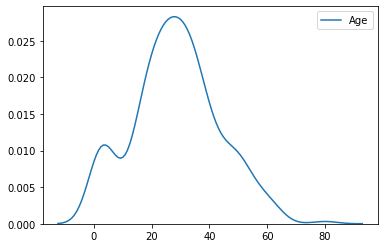

In [14]:
sns.kdeplot(survived_people['Age'])

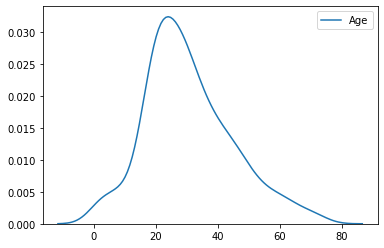

In [15]:
sns.kdeplot(dead_people['Age'])

In [16]:
corr_matrix = train_data_without_names_ticket.corr()

In [17]:
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
C              0.168240
Parch          0.081629
Q              0.003650
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
S             -0.155660
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64

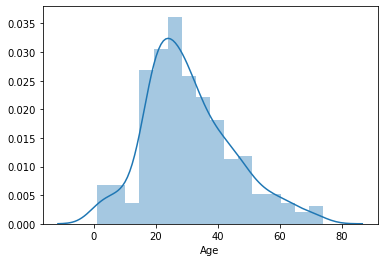

In [18]:
sns.distplot(dead_people['Age'])

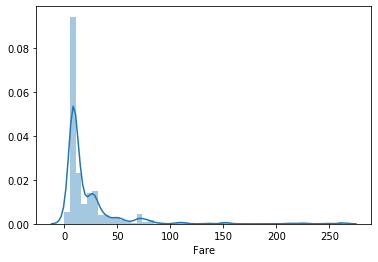

In [19]:
sns.distplot(dead_people['Fare'])

In [20]:
age_dead = dead_people.Age.median()
print(age_dead)

28.0


In [21]:
age_survived = survived_people.Age.median()
print(age_survived)

28.0


In [22]:
survived_people[survived_people.Sex == 1].Sex.count()

109

In [23]:
survived_people[survived_people.Sex == 0].Sex.count()

233

In [24]:
dead_people[dead_people.Sex == 0].Sex.count()

81

In [25]:
dead_people[dead_people.Sex == 1].Sex.count()

468

In [26]:
dead_people.groupby('Parch', as_index=False).mean().drop(['PassengerId'], axis=1)

,Parch,Pclass,Age,SibSp,Fare,Sex,C,Q,S
0,0,2.519101,32.082090,0.186517,16.548124,0.907865,0.134831,0.087640,0.777528
1,1,2.471698,26.571429,1.547170,37.111642,0.735849,0.207547,0.113208,0.679245
2,2,2.675000,17.000000,3.275000,55.625000,0.525000,0.100000,0.025000,0.875000
3,3,3.000000,32.000000,1.000000,34.375000,0.500000,0.000000,0.000000,1.000000
4,4,2.500000,44.500000,0.750000,84.968750,0.500000,0.000000,0.000000,1.000000
5,5,3.000000,39.500000,0.500000,32.840625,0.250000,0.000000,0.250000,0.750000
6,6,3.000000,43.000000,1.000000,46.900000,0.000000,0.000000,0.000000,1.000000


In [27]:
dead_people.groupby('Pclass', as_index=False).mean().drop(['PassengerId'], axis=1)

,Pclass,Age,SibSp,Parch,Fare,Sex,C,Q,S
0,1,43.695312,0.287500,0.300000,64.684008,0.962500,0.325000,0.012500,0.662500
1,2,33.544444,0.319588,0.144330,19.412328,0.938144,0.082474,0.010309,0.907216
2,3,26.555556,0.672043,0.384409,13.669364,0.806452,0.110215,0.120968,0.768817


In [28]:
dead_people.groupby('Pclass', as_index=False).mean().drop(['PassengerId'], axis=1)

,Pclass,Age,SibSp,Parch,Fare,Sex,C,Q,S
0,1,43.695312,0.287500,0.300000,64.684008,0.962500,0.325000,0.012500,0.662500
1,2,33.544444,0.319588,0.144330,19.412328,0.938144,0.082474,0.010309,0.907216
2,3,26.555556,0.672043,0.384409,13.669364,0.806452,0.110215,0.120968,0.768817


In [29]:
train_data_without_names_ticket_with_ages = train_data_without_names_ticket.fillna(value=age_dead)

In [30]:
train_data_without_names_ticket_with_ages[train_data_without_names_ticket_with_ages.Survived==0].\
                            groupby('Pclass', as_index=False).mean().drop(['PassengerId'], axis=1)

,Pclass,Survived,Age,SibSp,Parch,Fare,Sex,C,Q,S
0,1,0.0,40.556250,0.287500,0.300000,64.684008,0.962500,0.325000,0.012500,0.662500
1,2,0.0,33.144330,0.319588,0.144330,19.412328,0.938144,0.082474,0.010309,0.907216
2,3,0.0,26.951613,0.672043,0.384409,13.669364,0.806452,0.110215,0.120968,0.768817


In [31]:
train_data_without_names_ticket_with_ages.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex            0
C              0
Q              0
S              0
dtype: int64

In [32]:
X = train_data_without_names_ticket_with_ages.drop(['Survived'], axis=1)

In [33]:
y = train_data_without_names_ticket_with_ages.Survived

In [34]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.25, random_state=42)

In [35]:
X_train.shape

(668, 10)

In [36]:
y_train.shape

(668,)

In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier

calibrated_forest = CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=10))
param_grid = {'base_estimator__max_depth': range(1,20) }
search = GridSearchCV(calibrated_forest, param_grid, cv=5)

search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True,
                                                                                    ccp_alpha=0.0,
                                                                                    class_weight=None,
                                                                                    criterion='gini',
                                                                                    max_depth=None,
                                                                                    max_features='auto',
                                                                                    max_leaf_nodes=None,
                                                                                    max_samples=None,
                                                                                    min_impurity_decrease=0.0,
                                     

In [57]:
search.score(X_test, y_test)

0.8251121076233184

In [58]:
search.fit(X_test, y_test)
search.score(X_test, y_test)

0.9865470852017937

In [40]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [41]:
predictionsId = test_data.PassengerId

In [42]:
test_data = test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_data = pd.get_dummies(test_data)

In [43]:
test_data = test_data.rename(columns={'Sex_male':'Sex', 'Embarked_C':'C', 'Embarked_Q':'Q',
                                                'Embarked_S':'S'})
test_data.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex,C,Q,S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


In [44]:
test_data = test_data.fillna(value=age_dead)

In [45]:
test_data.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex,C,Q,S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


In [46]:
predictions = search.predict(test_data)

In [47]:
data_pred = {'PassengerId':predictionsId, 'Survived':predictions}

In [48]:
df_pred = pd.DataFrame(data=data_pred)

In [49]:
df_pred.to_csv('submission.csv', index=False)

In [50]:
df_pred.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,1
4,896,0


In [51]:
subm = pd.read_csv('gender_submission.csv')

In [52]:
subm.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [54]:
from sklearn.metrics import mean_squared_error

mean_squared_error(subm.Survived, predictions)

0.43301435406698563

In [59]:
X_train.shape

(668, 10)

In [191]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
accuracy = []
for i in range(1, 100): 
    model.fit(X_train, y_train, epochs=i, batch_size=512)
    _,acc = model.evaluate(X_test, y_test)
    accuracy.append(acc)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

7/7 [==============================] - 0s 13ms/step - loss: 1.5066 - accuracy: 0.4036
Epoch 1/2
2/2 [==============================] - 0s 3ms/step - loss: 1.7485 - accuracy: 0.4177
Epoch 2/2
7/7 [==============================] - 0s 5ms/step - loss: 1.4064 - accuracy: 0.3991
Epoch 1/3
2/2 [==============================] - 0s 13ms/step - loss: 1.3169 - accuracy: 0.4626
Epoch 2/3
2/2 [==============================] - 0s 2ms/step - loss: 0.7205 - accuracy: 0.5629
Epoch 3/3
7/7 [==========================

2/2 [==============================] - 0s 15ms/step - loss: 0.9010 - accuracy: 0.6108
Epoch 4/12
2/2 [==============================] - 0s 2ms/step - loss: 0.7620 - accuracy: 0.5913
Epoch 5/12
2/2 [==============================] - 0s 2ms/step - loss: 1.0609 - accuracy: 0.5749
Epoch 6/12
2/2 [==============================] - 0s 7ms/step - loss: 0.9262 - accuracy: 0.5823
Epoch 7/12
2/2 [==============================] - 0s 2ms/step - loss: 1.0670 - accuracy: 0.5928
Epoch 8/12
2/2 [==============================] - 0s 2ms/step - loss: 0.8388 - accuracy: 0.5868
Epoch 9/12
2/2 [==============================] - 0s 2ms/step - loss: 0.9936 - accuracy: 0.5763
Epoch 10/12
2/2 [==============================] - 0s 8ms/step - loss: 0.9174 - accuracy: 0.6213
Epoch 11/12
2/2 [==============================] - 0s 3ms/step - loss: 0.7359 - accuracy: 0.6198
Epoch 12/12
7/7 [==============================] - 0s 3ms/step - loss: 1.0110 - accuracy: 0.5964
Epoch 1/13
2/2 [==============================]

2/2 [==============================] - 0s 2ms/step - loss: 0.6565 - accuracy: 0.6482
Epoch 14/17
2/2 [==============================] - 0s 2ms/step - loss: 0.7222 - accuracy: 0.6272
Epoch 15/17
2/2 [==============================] - 0s 2ms/step - loss: 0.7035 - accuracy: 0.6362
Epoch 16/17
2/2 [==============================] - 0s 2ms/step - loss: 0.7220 - accuracy: 0.6108
Epoch 17/17
7/7 [==============================] - 0s 3ms/step - loss: 0.8164 - accuracy: 0.6054
Epoch 1/18
2/2 [==============================] - 0s 19ms/step - loss: 0.7841 - accuracy: 0.5913
Epoch 2/18
2/2 [==============================] - 0s 12ms/step - loss: 0.8362 - accuracy: 0.6033
Epoch 3/18
2/2 [==============================] - 0s 15ms/step - loss: 0.6910 - accuracy: 0.6287
Epoch 4/18
2/2 [==============================] - 0s 12ms/step - loss: 0.7765 - accuracy: 0.5898
Epoch 5/18
2/2 [==============================] - 0s 19ms/step - loss: 0.8840 - accuracy: 0.5928
Epoch 6/18
2/2 [==========================

2/2 [==============================] - 0s 5ms/step - loss: 0.6915 - accuracy: 0.6737
Epoch 21/21
7/7 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.6413
Epoch 1/22
2/2 [==============================] - 0s 8ms/step - loss: 0.6600 - accuracy: 0.6512
Epoch 2/22
2/2 [==============================] - 0s 6ms/step - loss: 0.6706 - accuracy: 0.6602
Epoch 3/22
2/2 [==============================] - 0s 5ms/step - loss: 0.6139 - accuracy: 0.6916
Epoch 4/22
2/2 [==============================] - 0s 4ms/step - loss: 0.7094 - accuracy: 0.6018
Epoch 5/22
2/2 [==============================] - 0s 5ms/step - loss: 0.8361 - accuracy: 0.6512
Epoch 6/22
2/2 [==============================] - 0s 8ms/step - loss: 0.6034 - accuracy: 0.6826
Epoch 7/22
2/2 [==============================] - 0s 9ms/step - loss: 0.6352 - accuracy: 0.6692
Epoch 8/22
2/2 [==============================] - 0s 4ms/step - loss: 0.7287 - accuracy: 0.6497
Epoch 9/22
2/2 [==============================] - 

2/2 [==============================] - 0s 7ms/step - loss: 0.5882 - accuracy: 0.7036
Epoch 12/25
2/2 [==============================] - 0s 2ms/step - loss: 0.6770 - accuracy: 0.5913
Epoch 13/25
2/2 [==============================] - 0s 2ms/step - loss: 0.6742 - accuracy: 0.5614
Epoch 14/25
2/2 [==============================] - 0s 2ms/step - loss: 0.5937 - accuracy: 0.7036
Epoch 15/25
2/2 [==============================] - 0s 2ms/step - loss: 0.6074 - accuracy: 0.6901
Epoch 16/25
2/2 [==============================] - 0s 2ms/step - loss: 0.6338 - accuracy: 0.6871
Epoch 17/25
2/2 [==============================] - 0s 3ms/step - loss: 0.6287 - accuracy: 0.6976
Epoch 18/25
2/2 [==============================] - 0s 3ms/step - loss: 0.6199 - accuracy: 0.7051
Epoch 19/25
2/2 [==============================] - 0s 6ms/step - loss: 0.5959 - accuracy: 0.7006
Epoch 20/25
2/2 [==============================] - 0s 8ms/step - loss: 0.6345 - accuracy: 0.6916
Epoch 21/25
2/2 [=========================

2/2 [==============================] - 0s 2ms/step - loss: 0.5903 - accuracy: 0.7036
Epoch 16/28
2/2 [==============================] - 0s 1ms/step - loss: 0.6053 - accuracy: 0.7036
Epoch 17/28
2/2 [==============================] - 0s 2ms/step - loss: 0.5603 - accuracy: 0.7126
Epoch 18/28
2/2 [==============================] - 0s 3ms/step - loss: 0.6671 - accuracy: 0.5958
Epoch 19/28
2/2 [==============================] - 0s 2ms/step - loss: 0.5671 - accuracy: 0.7171
Epoch 20/28
2/2 [==============================] - 0s 2ms/step - loss: 0.5904 - accuracy: 0.6961
Epoch 21/28
2/2 [==============================] - 0s 4ms/step - loss: 0.6027 - accuracy: 0.6916
Epoch 22/28
2/2 [==============================] - 0s 4ms/step - loss: 0.6345 - accuracy: 0.6856
Epoch 23/28
2/2 [==============================] - 0s 4ms/step - loss: 0.5761 - accuracy: 0.7051
Epoch 24/28
2/2 [==============================] - 0s 2ms/step - loss: 0.5963 - accuracy: 0.6871
Epoch 25/28
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.5535 - accuracy: 0.7260
Epoch 11/31
2/2 [==============================] - 0s 3ms/step - loss: 0.5605 - accuracy: 0.7216
Epoch 12/31
2/2 [==============================] - 0s 4ms/step - loss: 0.5865 - accuracy: 0.6916
Epoch 13/31
2/2 [==============================] - 0s 5ms/step - loss: 0.5671 - accuracy: 0.7036
Epoch 14/31
2/2 [==============================] - 0s 3ms/step - loss: 0.5494 - accuracy: 0.7246
Epoch 15/31
2/2 [==============================] - 0s 7ms/step - loss: 0.6102 - accuracy: 0.6766
Epoch 16/31
2/2 [==============================] - 0s 5ms/step - loss: 0.6228 - accuracy: 0.6931
Epoch 17/31
2/2 [==============================] - 0s 15ms/step - loss: 0.5502 - accuracy: 0.7260
Epoch 18/31
2/2 [==============================] - 0s 9ms/step - loss: 0.5518 - accuracy: 0.7171
Epoch 19/31
2/2 [==============================] - 0s 3ms/step - loss: 0.5520 - accuracy: 0.7275
Epoch 20/31
2/2 [========================

Epoch 30/33
2/2 [==============================] - 0s 2ms/step - loss: 0.5574 - accuracy: 0.7201
Epoch 31/33
2/2 [==============================] - 0s 2ms/step - loss: 0.5870 - accuracy: 0.7051
Epoch 32/33
2/2 [==============================] - 0s 2ms/step - loss: 0.5541 - accuracy: 0.7231
Epoch 33/33
7/7 [==============================] - 0s 2ms/step - loss: 0.8267 - accuracy: 0.7444
Epoch 1/34
2/2 [==============================] - 0s 23ms/step - loss: 0.5742 - accuracy: 0.7171
Epoch 2/34
2/2 [==============================] - 0s 3ms/step - loss: 0.5378 - accuracy: 0.7275
Epoch 3/34
2/2 [==============================] - 0s 3ms/step - loss: 0.5377 - accuracy: 0.7335
Epoch 4/34
2/2 [==============================] - 0s 3ms/step - loss: 0.5374 - accuracy: 0.7350
Epoch 5/34
2/2 [==============================] - 0s 3ms/step - loss: 0.5355 - accuracy: 0.7305
Epoch 6/34
2/2 [==============================] - 0s 3ms/step - loss: 0.5383 - accuracy: 0.7246
Epoch 7/34
2/2 [===================

2/2 [==============================] - 0s 5ms/step - loss: 0.5733 - accuracy: 0.7126
Epoch 11/36
2/2 [==============================] - 0s 3ms/step - loss: 0.6039 - accuracy: 0.6662
Epoch 12/36
2/2 [==============================] - 0s 3ms/step - loss: 0.5325 - accuracy: 0.7290
Epoch 13/36
2/2 [==============================] - 0s 2ms/step - loss: 0.5462 - accuracy: 0.7260
Epoch 14/36
2/2 [==============================] - 0s 2ms/step - loss: 0.5432 - accuracy: 0.7335
Epoch 15/36
2/2 [==============================] - 0s 7ms/step - loss: 0.5254 - accuracy: 0.7275
Epoch 16/36
2/2 [==============================] - 0s 4ms/step - loss: 0.5287 - accuracy: 0.7335
Epoch 17/36
2/2 [==============================] - 0s 6ms/step - loss: 0.5310 - accuracy: 0.7320
Epoch 18/36
2/2 [==============================] - 0s 2ms/step - loss: 0.5765 - accuracy: 0.7006
Epoch 19/36
2/2 [==============================] - 0s 2ms/step - loss: 0.5486 - accuracy: 0.7171
Epoch 20/36
2/2 [=========================

Epoch 20/38
2/2 [==============================] - 0s 2ms/step - loss: 0.5317 - accuracy: 0.7246
Epoch 21/38
2/2 [==============================] - 0s 2ms/step - loss: 0.5173 - accuracy: 0.7320
Epoch 22/38
2/2 [==============================] - 0s 8ms/step - loss: 0.5155 - accuracy: 0.7305
Epoch 23/38
2/2 [==============================] - 0s 2ms/step - loss: 0.5465 - accuracy: 0.7290
Epoch 24/38
2/2 [==============================] - 0s 2ms/step - loss: 0.5893 - accuracy: 0.6677
Epoch 25/38
2/2 [==============================] - 0s 3ms/step - loss: 0.5195 - accuracy: 0.7380
Epoch 26/38
2/2 [==============================] - 0s 5ms/step - loss: 0.5324 - accuracy: 0.7201
Epoch 27/38
2/2 [==============================] - 0s 3ms/step - loss: 0.5523 - accuracy: 0.7216
Epoch 28/38
2/2 [==============================] - 0s 2ms/step - loss: 0.5540 - accuracy: 0.7201
Epoch 29/38
2/2 [==============================] - 0s 3ms/step - loss: 0.5292 - accuracy: 0.7201
Epoch 30/38
2/2 [=============

2/2 [==============================] - 0s 2ms/step - loss: 0.5076 - accuracy: 0.7335
Epoch 26/40
2/2 [==============================] - 0s 4ms/step - loss: 0.5124 - accuracy: 0.7395
Epoch 27/40
2/2 [==============================] - 0s 2ms/step - loss: 0.5752 - accuracy: 0.7066
Epoch 28/40
2/2 [==============================] - 0s 6ms/step - loss: 0.5515 - accuracy: 0.6961
Epoch 29/40
2/2 [==============================] - 0s 2ms/step - loss: 0.5096 - accuracy: 0.7515
Epoch 30/40
2/2 [==============================] - 0s 10ms/step - loss: 0.5153 - accuracy: 0.7425
Epoch 31/40
2/2 [==============================] - 0s 3ms/step - loss: 0.5557 - accuracy: 0.7216
Epoch 32/40
2/2 [==============================] - 0s 6ms/step - loss: 0.5241 - accuracy: 0.7335
Epoch 33/40
2/2 [==============================] - 0s 3ms/step - loss: 0.5479 - accuracy: 0.7141
Epoch 34/40
2/2 [==============================] - 0s 7ms/step - loss: 0.5178 - accuracy: 0.7350
Epoch 35/40
2/2 [========================

Epoch 27/42
2/2 [==============================] - 0s 3ms/step - loss: 0.5131 - accuracy: 0.7246
Epoch 28/42
2/2 [==============================] - 0s 3ms/step - loss: 0.5226 - accuracy: 0.7216
Epoch 29/42
2/2 [==============================] - 0s 4ms/step - loss: 0.5028 - accuracy: 0.7320
Epoch 30/42
2/2 [==============================] - 0s 3ms/step - loss: 0.5127 - accuracy: 0.7545
Epoch 31/42
2/2 [==============================] - 0s 5ms/step - loss: 0.5133 - accuracy: 0.7380
Epoch 32/42
2/2 [==============================] - 0s 3ms/step - loss: 0.4986 - accuracy: 0.7425
Epoch 33/42
2/2 [==============================] - 0s 3ms/step - loss: 0.4980 - accuracy: 0.7425
Epoch 34/42
2/2 [==============================] - 0s 3ms/step - loss: 0.4997 - accuracy: 0.7485
Epoch 35/42
2/2 [==============================] - 0s 3ms/step - loss: 0.6290 - accuracy: 0.6707
Epoch 36/42
2/2 [==============================] - 0s 3ms/step - loss: 0.5457 - accuracy: 0.7156
Epoch 37/42
2/2 [=============

2/2 [==============================] - 0s 3ms/step - loss: 0.4990 - accuracy: 0.7440
Epoch 25/44
2/2 [==============================] - 0s 4ms/step - loss: 0.4978 - accuracy: 0.7350
Epoch 26/44
2/2 [==============================] - 0s 9ms/step - loss: 0.5701 - accuracy: 0.6871
Epoch 27/44
2/2 [==============================] - 0s 2ms/step - loss: 0.5185 - accuracy: 0.7455
Epoch 28/44
2/2 [==============================] - 0s 4ms/step - loss: 0.4974 - accuracy: 0.7305
Epoch 29/44
2/2 [==============================] - 0s 4ms/step - loss: 0.5115 - accuracy: 0.7260
Epoch 30/44
2/2 [==============================] - 0s 6ms/step - loss: 0.4942 - accuracy: 0.7410
Epoch 31/44
2/2 [==============================] - 0s 3ms/step - loss: 0.4896 - accuracy: 0.7500
Epoch 32/44
2/2 [==============================] - 0s 13ms/step - loss: 0.4955 - accuracy: 0.7305
Epoch 33/44
2/2 [==============================] - 0s 2ms/step - loss: 0.6228 - accuracy: 0.6766
Epoch 34/44
2/2 [========================

2/2 [==============================] - 0s 2ms/step - loss: 0.4863 - accuracy: 0.7410
Epoch 18/46
2/2 [==============================] - 0s 2ms/step - loss: 0.4935 - accuracy: 0.7545
Epoch 19/46
2/2 [==============================] - 0s 2ms/step - loss: 0.4822 - accuracy: 0.7500
Epoch 20/46
2/2 [==============================] - 0s 2ms/step - loss: 0.5646 - accuracy: 0.7246
Epoch 21/46
2/2 [==============================] - 0s 5ms/step - loss: 0.4969 - accuracy: 0.7440
Epoch 22/46
2/2 [==============================] - 0s 3ms/step - loss: 0.5046 - accuracy: 0.7320
Epoch 23/46
2/2 [==============================] - 0s 2ms/step - loss: 0.5211 - accuracy: 0.7201
Epoch 24/46
2/2 [==============================] - 0s 3ms/step - loss: 0.5225 - accuracy: 0.7380
Epoch 25/46
2/2 [==============================] - 0s 2ms/step - loss: 0.4935 - accuracy: 0.7365
Epoch 26/46
2/2 [==============================] - 0s 2ms/step - loss: 0.4780 - accuracy: 0.7560
Epoch 27/46
2/2 [=========================

2/2 [==============================] - 0s 10ms/step - loss: 0.5264 - accuracy: 0.7365
Epoch 7/48
2/2 [==============================] - 0s 8ms/step - loss: 0.5424 - accuracy: 0.7186
Epoch 8/48
2/2 [==============================] - 0s 8ms/step - loss: 0.4793 - accuracy: 0.7455
Epoch 9/48
2/2 [==============================] - 0s 4ms/step - loss: 0.4702 - accuracy: 0.7500
Epoch 10/48
2/2 [==============================] - 0s 6ms/step - loss: 0.4689 - accuracy: 0.7470
Epoch 11/48
2/2 [==============================] - 0s 6ms/step - loss: 0.5309 - accuracy: 0.7335
Epoch 12/48
2/2 [==============================] - 0s 6ms/step - loss: 0.4655 - accuracy: 0.7530
Epoch 13/48
2/2 [==============================] - 0s 11ms/step - loss: 0.4659 - accuracy: 0.7530
Epoch 14/48
2/2 [==============================] - 0s 2ms/step - loss: 0.5024 - accuracy: 0.7335
Epoch 15/48
2/2 [==============================] - 0s 8ms/step - loss: 0.5235 - accuracy: 0.7650
Epoch 16/48
2/2 [==========================

2/2 [==============================] - 0s 8ms/step - loss: 0.4892 - accuracy: 0.7485
Epoch 42/49
2/2 [==============================] - 0s 3ms/step - loss: 0.4751 - accuracy: 0.7515
Epoch 43/49
2/2 [==============================] - 0s 3ms/step - loss: 0.4856 - accuracy: 0.7470
Epoch 44/49
2/2 [==============================] - 0s 3ms/step - loss: 0.4731 - accuracy: 0.7545
Epoch 45/49
2/2 [==============================] - 0s 4ms/step - loss: 0.4921 - accuracy: 0.7455
Epoch 46/49
2/2 [==============================] - 0s 2ms/step - loss: 0.4948 - accuracy: 0.7500
Epoch 47/49
2/2 [==============================] - 0s 4ms/step - loss: 0.5012 - accuracy: 0.7455
Epoch 48/49
2/2 [==============================] - 0s 3ms/step - loss: 0.4886 - accuracy: 0.7455
Epoch 49/49
7/7 [==============================] - 0s 3ms/step - loss: 1.0020 - accuracy: 0.7220
Epoch 1/50
2/2 [==============================] - 0s 12ms/step - loss: 0.4847 - accuracy: 0.7470
Epoch 2/50
2/2 [==========================

2/2 [==============================] - 0s 3ms/step - loss: 0.4779 - accuracy: 0.7620
Epoch 25/51
2/2 [==============================] - 0s 5ms/step - loss: 0.4619 - accuracy: 0.7665
Epoch 26/51
2/2 [==============================] - 0s 5ms/step - loss: 0.4636 - accuracy: 0.7575
Epoch 27/51
2/2 [==============================] - 0s 2ms/step - loss: 0.5042 - accuracy: 0.7515
Epoch 28/51
2/2 [==============================] - 0s 3ms/step - loss: 0.5276 - accuracy: 0.7320
Epoch 29/51
2/2 [==============================] - 0s 2ms/step - loss: 0.4684 - accuracy: 0.7620
Epoch 30/51
2/2 [==============================] - 0s 3ms/step - loss: 0.4586 - accuracy: 0.7635
Epoch 31/51
2/2 [==============================] - 0s 8ms/step - loss: 0.5305 - accuracy: 0.7260
Epoch 32/51
2/2 [==============================] - 0s 4ms/step - loss: 0.4814 - accuracy: 0.7440
Epoch 33/51
2/2 [==============================] - 0s 4ms/step - loss: 0.4520 - accuracy: 0.7620
Epoch 34/51
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.5104 - accuracy: 0.7440
Epoch 4/53
2/2 [==============================] - 0s 8ms/step - loss: 0.5162 - accuracy: 0.7350
Epoch 5/53
2/2 [==============================] - 0s 3ms/step - loss: 0.4639 - accuracy: 0.7500
Epoch 6/53
2/2 [==============================] - 0s 3ms/step - loss: 0.4743 - accuracy: 0.7635
Epoch 7/53
2/2 [==============================] - 0s 3ms/step - loss: 0.5057 - accuracy: 0.7440
Epoch 8/53
2/2 [==============================] - 0s 4ms/step - loss: 0.4558 - accuracy: 0.7680
Epoch 9/53
2/2 [==============================] - 0s 3ms/step - loss: 0.4515 - accuracy: 0.7784
Epoch 10/53
2/2 [==============================] - 0s 3ms/step - loss: 0.4588 - accuracy: 0.7695
Epoch 11/53
2/2 [==============================] - 0s 3ms/step - loss: 0.6040 - accuracy: 0.6302
Epoch 12/53
2/2 [==============================] - 0s 3ms/step - loss: 0.4832 - accuracy: 0.7665
Epoch 13/53
2/2 [==============================]

2/2 [==============================] - 0s 4ms/step - loss: 0.4619 - accuracy: 0.7710
Epoch 34/54
2/2 [==============================] - 0s 3ms/step - loss: 0.4359 - accuracy: 0.8009
Epoch 35/54
2/2 [==============================] - 0s 3ms/step - loss: 0.4306 - accuracy: 0.7934
Epoch 36/54
2/2 [==============================] - 0s 7ms/step - loss: 0.4398 - accuracy: 0.7784
Epoch 37/54
2/2 [==============================] - 0s 9ms/step - loss: 0.5400 - accuracy: 0.7290
Epoch 38/54
2/2 [==============================] - 0s 7ms/step - loss: 0.5901 - accuracy: 0.6916
Epoch 39/54
2/2 [==============================] - 0s 14ms/step - loss: 0.4596 - accuracy: 0.7754
Epoch 40/54
2/2 [==============================] - 0s 3ms/step - loss: 0.4618 - accuracy: 0.7665
Epoch 41/54
2/2 [==============================] - 0s 8ms/step - loss: 0.4686 - accuracy: 0.7784
Epoch 42/54
2/2 [==============================] - 0s 10ms/step - loss: 0.4482 - accuracy: 0.7814
Epoch 43/54
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 0.4471 - accuracy: 0.7859
Epoch 7/56
2/2 [==============================] - 0s 2ms/step - loss: 0.4361 - accuracy: 0.7844
Epoch 8/56
2/2 [==============================] - 0s 2ms/step - loss: 0.4260 - accuracy: 0.7889
Epoch 9/56
2/2 [==============================] - 0s 10ms/step - loss: 0.4462 - accuracy: 0.7725
Epoch 10/56
2/2 [==============================] - 0s 2ms/step - loss: 0.5564 - accuracy: 0.7380
Epoch 11/56
2/2 [==============================] - 0s 6ms/step - loss: 0.4272 - accuracy: 0.7964
Epoch 12/56
2/2 [==============================] - 0s 3ms/step - loss: 0.4571 - accuracy: 0.7665
Epoch 13/56
2/2 [==============================] - 0s 5ms/step - loss: 0.5095 - accuracy: 0.7515
Epoch 14/56
2/2 [==============================] - 0s 3ms/step - loss: 0.4860 - accuracy: 0.7590
Epoch 15/56
2/2 [==============================] - 0s 9ms/step - loss: 0.4303 - accuracy: 0.7814
Epoch 16/56
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 0.4423 - accuracy: 0.7889
Epoch 34/57
2/2 [==============================] - 0s 2ms/step - loss: 0.4333 - accuracy: 0.8039
Epoch 35/57
2/2 [==============================] - 0s 6ms/step - loss: 0.4498 - accuracy: 0.7725
Epoch 36/57
2/2 [==============================] - 0s 4ms/step - loss: 0.5327 - accuracy: 0.7470
Epoch 37/57
2/2 [==============================] - 0s 2ms/step - loss: 0.4485 - accuracy: 0.7904
Epoch 38/57
2/2 [==============================] - 0s 8ms/step - loss: 0.4538 - accuracy: 0.8009
Epoch 39/57
2/2 [==============================] - 0s 8ms/step - loss: 0.5003 - accuracy: 0.7575
Epoch 40/57
2/2 [==============================] - 0s 2ms/step - loss: 0.4418 - accuracy: 0.8039
Epoch 41/57
2/2 [==============================] - 0s 7ms/step - loss: 0.4395 - accuracy: 0.8024
Epoch 42/57
2/2 [==============================] - 0s 2ms/step - loss: 0.6066 - accuracy: 0.6826
Epoch 43/57
2/2 [=========================

7/7 [==============================] - 0s 1ms/step - loss: 1.1559 - accuracy: 0.7578
Epoch 1/59
2/2 [==============================] - 0s 11ms/step - loss: 0.4613 - accuracy: 0.7979
Epoch 2/59
2/2 [==============================] - 0s 3ms/step - loss: 0.4140 - accuracy: 0.8219
Epoch 3/59
2/2 [==============================] - 0s 5ms/step - loss: 0.4251 - accuracy: 0.7994
Epoch 4/59
2/2 [==============================] - 0s 8ms/step - loss: 0.5318 - accuracy: 0.7485
Epoch 5/59
2/2 [==============================] - 0s 3ms/step - loss: 0.4459 - accuracy: 0.7799
Epoch 6/59
2/2 [==============================] - 0s 3ms/step - loss: 0.4437 - accuracy: 0.7859
Epoch 7/59
2/2 [==============================] - 0s 5ms/step - loss: 0.4916 - accuracy: 0.7575
Epoch 8/59
2/2 [==============================] - 0s 16ms/step - loss: 0.4393 - accuracy: 0.7829
Epoch 9/59
2/2 [==============================] - 0s 7ms/step - loss: 0.4734 - accuracy: 0.7740
Epoch 10/59
2/2 [==============================] 

2/2 [==============================] - 0s 8ms/step - loss: 0.4350 - accuracy: 0.7904
Epoch 25/60
2/2 [==============================] - 0s 3ms/step - loss: 0.4510 - accuracy: 0.7949
Epoch 26/60
2/2 [==============================] - 0s 3ms/step - loss: 0.4092 - accuracy: 0.7994
Epoch 27/60
2/2 [==============================] - 0s 2ms/step - loss: 0.4486 - accuracy: 0.7919
Epoch 28/60
2/2 [==============================] - 0s 5ms/step - loss: 0.4745 - accuracy: 0.7784
Epoch 29/60
2/2 [==============================] - 0s 6ms/step - loss: 0.4202 - accuracy: 0.8024
Epoch 30/60
2/2 [==============================] - 0s 5ms/step - loss: 0.5237 - accuracy: 0.7590
Epoch 31/60
2/2 [==============================] - 0s 5ms/step - loss: 0.4421 - accuracy: 0.8024
Epoch 32/60
2/2 [==============================] - 0s 4ms/step - loss: 0.4130 - accuracy: 0.8039
Epoch 33/60
2/2 [==============================] - 0s 6ms/step - loss: 0.4118 - accuracy: 0.8144
Epoch 34/60
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.4519 - accuracy: 0.7844
Epoch 48/61
2/2 [==============================] - 0s 4ms/step - loss: 0.5559 - accuracy: 0.6527
Epoch 49/61
2/2 [==============================] - 0s 3ms/step - loss: 0.4207 - accuracy: 0.7934
Epoch 50/61
2/2 [==============================] - ETA: 0s - loss: 0.4239 - accuracy: 0.80 - 0s 7ms/step - loss: 0.4159 - accuracy: 0.8039
Epoch 51/61
2/2 [==============================] - 0s 4ms/step - loss: 0.4204 - accuracy: 0.8054
Epoch 52/61
2/2 [==============================] - 0s 2ms/step - loss: 0.4362 - accuracy: 0.8024
Epoch 53/61
2/2 [==============================] - 0s 2ms/step - loss: 0.4180 - accuracy: 0.8039
Epoch 54/61
2/2 [==============================] - 0s 7ms/step - loss: 0.4762 - accuracy: 0.7665
Epoch 55/61
2/2 [==============================] - 0s 2ms/step - loss: 0.4638 - accuracy: 0.7829
Epoch 56/61
2/2 [==============================] - 0s 2ms/step - loss: 0.4825 - accuracy: 0.7695


2/2 [==============================] - 0s 3ms/step - loss: 0.4002 - accuracy: 0.8114
Epoch 7/63
2/2 [==============================] - 0s 11ms/step - loss: 0.3942 - accuracy: 0.8189
Epoch 8/63
2/2 [==============================] - 0s 5ms/step - loss: 0.4007 - accuracy: 0.8174
Epoch 9/63
2/2 [==============================] - 0s 4ms/step - loss: 0.5094 - accuracy: 0.7575
Epoch 10/63
2/2 [==============================] - 0s 3ms/step - loss: 0.5204 - accuracy: 0.7515
Epoch 11/63
2/2 [==============================] - 0s 4ms/step - loss: 0.4178 - accuracy: 0.8144
Epoch 12/63
2/2 [==============================] - 0s 4ms/step - loss: 0.4067 - accuracy: 0.8099
Epoch 13/63
2/2 [==============================] - 0s 10ms/step - loss: 0.4103 - accuracy: 0.8129
Epoch 14/63
2/2 [==============================] - 0s 8ms/step - loss: 0.4451 - accuracy: 0.7859
Epoch 15/63
2/2 [==============================] - 0s 4ms/step - loss: 0.4317 - accuracy: 0.7919
Epoch 16/63
2/2 [==========================

2/2 [==============================] - 0s 2ms/step - loss: 0.4293 - accuracy: 0.7949
Epoch 27/64
2/2 [==============================] - 0s 6ms/step - loss: 0.4040 - accuracy: 0.8174
Epoch 28/64
2/2 [==============================] - 0s 2ms/step - loss: 0.4132 - accuracy: 0.8099
Epoch 29/64
2/2 [==============================] - 0s 2ms/step - loss: 0.4685 - accuracy: 0.7754
Epoch 30/64
2/2 [==============================] - 0s 5ms/step - loss: 0.4030 - accuracy: 0.8174
Epoch 31/64
2/2 [==============================] - 0s 4ms/step - loss: 0.3891 - accuracy: 0.8234
Epoch 32/64
2/2 [==============================] - 0s 2ms/step - loss: 0.4110 - accuracy: 0.8009
Epoch 33/64
2/2 [==============================] - 0s 2ms/step - loss: 0.6008 - accuracy: 0.7066
Epoch 34/64
2/2 [==============================] - 0s 3ms/step - loss: 0.4323 - accuracy: 0.7919
Epoch 35/64
2/2 [==============================] - 0s 5ms/step - loss: 0.4077 - accuracy: 0.8129
Epoch 36/64
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.4082 - accuracy: 0.8189
Epoch 46/65
2/2 [==============================] - 0s 7ms/step - loss: 0.4782 - accuracy: 0.7650
Epoch 47/65
2/2 [==============================] - 0s 2ms/step - loss: 0.4067 - accuracy: 0.8114
Epoch 48/65
2/2 [==============================] - 0s 3ms/step - loss: 0.3941 - accuracy: 0.8249
Epoch 49/65
2/2 [==============================] - 0s 3ms/step - loss: 0.4162 - accuracy: 0.7994
Epoch 50/65
2/2 [==============================] - 0s 7ms/step - loss: 0.4392 - accuracy: 0.7889
Epoch 51/65
2/2 [==============================] - 0s 3ms/step - loss: 0.3960 - accuracy: 0.8219
Epoch 52/65
2/2 [==============================] - 0s 4ms/step - loss: 0.4423 - accuracy: 0.7934
Epoch 53/65
2/2 [==============================] - 0s 6ms/step - loss: 0.3942 - accuracy: 0.8249
Epoch 54/65
2/2 [==============================] - 0s 6ms/step - loss: 0.3973 - accuracy: 0.8159
Epoch 55/65
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.3991 - accuracy: 0.8099
Epoch 64/66
2/2 [==============================] - 0s 3ms/step - loss: 0.4259 - accuracy: 0.7979
Epoch 65/66
2/2 [==============================] - 0s 2ms/step - loss: 0.5338 - accuracy: 0.7515
Epoch 66/66
7/7 [==============================] - 0s 5ms/step - loss: 1.0216 - accuracy: 0.7758
Epoch 1/67
2/2 [==============================] - 0s 8ms/step - loss: 0.4232 - accuracy: 0.8069
Epoch 2/67
2/2 [==============================] - 0s 5ms/step - loss: 0.3863 - accuracy: 0.8249
Epoch 3/67
2/2 [==============================] - 0s 4ms/step - loss: 0.3965 - accuracy: 0.8114
Epoch 4/67
2/2 [==============================] - 0s 5ms/step - loss: 0.4206 - accuracy: 0.8024
Epoch 5/67
2/2 [==============================] - 0s 6ms/step - loss: 0.3804 - accuracy: 0.8189
Epoch 6/67
2/2 [==============================] - 0s 7ms/step - loss: 0.3744 - accuracy: 0.8249
Epoch 7/67
2/2 [==============================] 

2/2 [==============================] - 0s 8ms/step - loss: 0.4031 - accuracy: 0.8129
Epoch 13/68
2/2 [==============================] - 0s 5ms/step - loss: 0.4148 - accuracy: 0.7979
Epoch 14/68
2/2 [==============================] - 0s 2ms/step - loss: 0.4239 - accuracy: 0.8009
Epoch 15/68
2/2 [==============================] - 0s 2ms/step - loss: 0.3784 - accuracy: 0.8353
Epoch 16/68
2/2 [==============================] - 0s 2ms/step - loss: 0.3745 - accuracy: 0.8368
Epoch 17/68
2/2 [==============================] - 0s 7ms/step - loss: 0.3733 - accuracy: 0.8234
Epoch 18/68
2/2 [==============================] - 0s 6ms/step - loss: 0.3757 - accuracy: 0.8263
Epoch 19/68
2/2 [==============================] - 0s 2ms/step - loss: 0.4546 - accuracy: 0.7769
Epoch 20/68
2/2 [==============================] - 0s 6ms/step - loss: 0.5423 - accuracy: 0.7096
Epoch 21/68
2/2 [==============================] - 0s 6ms/step - loss: 0.3995 - accuracy: 0.8263
Epoch 22/68
2/2 [=========================

2/2 [==============================] - 0s 6ms/step - loss: 0.3748 - accuracy: 0.8323
Epoch 28/69
2/2 [==============================] - 0s 2ms/step - loss: 0.3779 - accuracy: 0.8278
Epoch 29/69
2/2 [==============================] - 0s 3ms/step - loss: 0.4110 - accuracy: 0.8099
Epoch 30/69
2/2 [==============================] - 0s 7ms/step - loss: 0.4689 - accuracy: 0.7889
Epoch 31/69
2/2 [==============================] - 0s 3ms/step - loss: 0.3828 - accuracy: 0.8293
Epoch 32/69
2/2 [==============================] - 0s 3ms/step - loss: 0.3883 - accuracy: 0.8114
Epoch 33/69
2/2 [==============================] - 0s 3ms/step - loss: 0.3731 - accuracy: 0.8383
Epoch 34/69
2/2 [==============================] - 0s 3ms/step - loss: 0.3843 - accuracy: 0.8234
Epoch 35/69
2/2 [==============================] - 0s 4ms/step - loss: 0.4573 - accuracy: 0.7784
Epoch 36/69
2/2 [==============================] - 0s 7ms/step - loss: 0.3728 - accuracy: 0.8323
Epoch 37/69
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.5423 - accuracy: 0.7500
Epoch 42/70
2/2 [==============================] - 0s 7ms/step - loss: 0.4004 - accuracy: 0.8129
Epoch 43/70
2/2 [==============================] - 0s 3ms/step - loss: 0.3961 - accuracy: 0.8009
Epoch 44/70
2/2 [==============================] - 0s 6ms/step - loss: 0.3892 - accuracy: 0.8099
Epoch 45/70
2/2 [==============================] - 0s 8ms/step - loss: 0.4742 - accuracy: 0.7844
Epoch 46/70
2/2 [==============================] - 0s 2ms/step - loss: 0.3841 - accuracy: 0.8383
Epoch 47/70
2/2 [==============================] - 0s 8ms/step - loss: 0.3819 - accuracy: 0.8308
Epoch 48/70
2/2 [==============================] - 0s 8ms/step - loss: 0.3836 - accuracy: 0.8234
Epoch 49/70
2/2 [==============================] - 0s 7ms/step - loss: 0.4077 - accuracy: 0.8159
Epoch 50/70
2/2 [==============================] - 0s 7ms/step - loss: 0.4847 - accuracy: 0.7740
Epoch 51/70
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.3752 - accuracy: 0.8263
Epoch 55/71
2/2 [==============================] - 0s 5ms/step - loss: 0.3810 - accuracy: 0.8219
Epoch 56/71
2/2 [==============================] - 0s 9ms/step - loss: 0.4255 - accuracy: 0.7844
Epoch 57/71
2/2 [==============================] - 0s 5ms/step - loss: 0.4185 - accuracy: 0.8114
Epoch 58/71
2/2 [==============================] - 0s 4ms/step - loss: 0.3967 - accuracy: 0.8069
Epoch 59/71
2/2 [==============================] - 0s 5ms/step - loss: 0.3874 - accuracy: 0.8144
Epoch 60/71
2/2 [==============================] - 0s 8ms/step - loss: 0.3661 - accuracy: 0.8323
Epoch 61/71
2/2 [==============================] - 0s 3ms/step - loss: 0.3636 - accuracy: 0.8368
Epoch 62/71
2/2 [==============================] - 0s 3ms/step - loss: 0.3740 - accuracy: 0.8278
Epoch 63/71
2/2 [==============================] - 0s 6ms/step - loss: 0.3724 - accuracy: 0.8368
Epoch 64/71
2/2 [=========================

2/2 [==============================] - 0s 2ms/step - loss: 0.3655 - accuracy: 0.8353
Epoch 67/72
2/2 [==============================] - 0s 3ms/step - loss: 0.3576 - accuracy: 0.8338
Epoch 68/72
2/2 [==============================] - 0s 3ms/step - loss: 0.3701 - accuracy: 0.8323
Epoch 69/72
2/2 [==============================] - 0s 3ms/step - loss: 0.5456 - accuracy: 0.7470
Epoch 70/72
2/2 [==============================] - 0s 3ms/step - loss: 0.4136 - accuracy: 0.8039
Epoch 71/72
2/2 [==============================] - 0s 6ms/step - loss: 0.3784 - accuracy: 0.8293
Epoch 72/72
7/7 [==============================] - 0s 2ms/step - loss: 1.2537 - accuracy: 0.7758
Epoch 1/73
2/2 [==============================] - 0s 8ms/step - loss: 0.3607 - accuracy: 0.8368
Epoch 2/73
2/2 [==============================] - 0s 2ms/step - loss: 0.3606 - accuracy: 0.8428
Epoch 3/73
2/2 [==============================] - 0s 3ms/step - loss: 0.4267 - accuracy: 0.7874
Epoch 4/73
2/2 [=============================

2/2 [==============================] - 0s 7ms/step - loss: 0.3922 - accuracy: 0.8129
Epoch 4/74
2/2 [==============================] - 0s 3ms/step - loss: 0.3785 - accuracy: 0.8234
Epoch 5/74
2/2 [==============================] - 0s 7ms/step - loss: 0.4558 - accuracy: 0.7695
Epoch 6/74
2/2 [==============================] - 0s 6ms/step - loss: 0.4065 - accuracy: 0.7979
Epoch 7/74
2/2 [==============================] - 0s 6ms/step - loss: 0.3937 - accuracy: 0.8204
Epoch 8/74
2/2 [==============================] - 0s 6ms/step - loss: 0.3623 - accuracy: 0.8398
Epoch 9/74
2/2 [==============================] - 0s 5ms/step - loss: 0.3548 - accuracy: 0.8368
Epoch 10/74
2/2 [==============================] - 0s 5ms/step - loss: 0.4012 - accuracy: 0.8024
Epoch 11/74
2/2 [==============================] - 0s 3ms/step - loss: 0.4737 - accuracy: 0.7874
Epoch 12/74
2/2 [==============================] - 0s 5ms/step - loss: 0.3736 - accuracy: 0.8398
Epoch 13/74
2/2 [==============================]

2/2 [==============================] - 0s 3ms/step - loss: 0.4923 - accuracy: 0.7605
Epoch 13/75
2/2 [==============================] - 0s 3ms/step - loss: 0.3773 - accuracy: 0.8308
Epoch 14/75
2/2 [==============================] - 0s 3ms/step - loss: 0.4007 - accuracy: 0.8039
Epoch 15/75
2/2 [==============================] - 0s 2ms/step - loss: 0.3803 - accuracy: 0.8114
Epoch 16/75
2/2 [==============================] - 0s 3ms/step - loss: 0.3675 - accuracy: 0.8353
Epoch 17/75
2/2 [==============================] - 0s 3ms/step - loss: 0.4033 - accuracy: 0.8069
Epoch 18/75
2/2 [==============================] - 0s 4ms/step - loss: 0.3856 - accuracy: 0.8099
Epoch 19/75
2/2 [==============================] - 0s 4ms/step - loss: 0.4411 - accuracy: 0.7859
Epoch 20/75
2/2 [==============================] - 0s 4ms/step - loss: 0.3770 - accuracy: 0.8308
Epoch 21/75
2/2 [==============================] - 0s 4ms/step - loss: 0.3894 - accuracy: 0.8219
Epoch 22/75
2/2 [=========================

2/2 [==============================] - 0s 10ms/step - loss: 0.4429 - accuracy: 0.7934
Epoch 21/76
2/2 [==============================] - 0s 2ms/step - loss: 0.3665 - accuracy: 0.8398
Epoch 22/76
2/2 [==============================] - 0s 3ms/step - loss: 0.3542 - accuracy: 0.8503
Epoch 23/76
2/2 [==============================] - 0s 12ms/step - loss: 0.3523 - accuracy: 0.8353
Epoch 24/76
2/2 [==============================] - 0s 2ms/step - loss: 0.3544 - accuracy: 0.8278
Epoch 25/76
2/2 [==============================] - 0s 2ms/step - loss: 0.3659 - accuracy: 0.8293
Epoch 26/76
2/2 [==============================] - 0s 3ms/step - loss: 0.4599 - accuracy: 0.7784
Epoch 27/76
2/2 [==============================] - 0s 6ms/step - loss: 0.4349 - accuracy: 0.7754
Epoch 28/76
2/2 [==============================] - 0s 4ms/step - loss: 0.3619 - accuracy: 0.8368
Epoch 29/76
2/2 [==============================] - 0s 3ms/step - loss: 0.4170 - accuracy: 0.8084
Epoch 30/76
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 0.4423 - accuracy: 0.7680
Epoch 28/77
2/2 [==============================] - 0s 3ms/step - loss: 0.3709 - accuracy: 0.8413
Epoch 29/77
2/2 [==============================] - 0s 2ms/step - loss: 0.3718 - accuracy: 0.8308
Epoch 30/77
2/2 [==============================] - 0s 3ms/step - loss: 0.3814 - accuracy: 0.8174
Epoch 31/77
2/2 [==============================] - 0s 7ms/step - loss: 0.3633 - accuracy: 0.8458
Epoch 32/77
2/2 [==============================] - 0s 4ms/step - loss: 0.3532 - accuracy: 0.8473
Epoch 33/77
2/2 [==============================] - 0s 4ms/step - loss: 0.3730 - accuracy: 0.8278
Epoch 34/77
2/2 [==============================] - 0s 2ms/step - loss: 0.3424 - accuracy: 0.8473
Epoch 35/77
2/2 [==============================] - 0s 4ms/step - loss: 0.3460 - accuracy: 0.8473
Epoch 36/77
2/2 [==============================] - 0s 5ms/step - loss: 0.4573 - accuracy: 0.7725
Epoch 37/77
2/2 [=========================

2/2 [==============================] - 0s 2ms/step - loss: 0.3353 - accuracy: 0.8533
Epoch 34/78
2/2 [==============================] - 0s 2ms/step - loss: 0.3803 - accuracy: 0.8323
Epoch 35/78
2/2 [==============================] - 0s 2ms/step - loss: 0.4193 - accuracy: 0.8039
Epoch 36/78
2/2 [==============================] - 0s 2ms/step - loss: 0.4410 - accuracy: 0.7859
Epoch 37/78
2/2 [==============================] - 0s 2ms/step - loss: 0.3559 - accuracy: 0.8443
Epoch 38/78
2/2 [==============================] - 0s 2ms/step - loss: 0.3541 - accuracy: 0.8443
Epoch 39/78
2/2 [==============================] - 0s 9ms/step - loss: 0.3774 - accuracy: 0.8204
Epoch 40/78
2/2 [==============================] - 0s 3ms/step - loss: 0.3685 - accuracy: 0.8293
Epoch 41/78
2/2 [==============================] - 0s 2ms/step - loss: 0.3424 - accuracy: 0.8518
Epoch 42/78
2/2 [==============================] - 0s 2ms/step - loss: 0.3770 - accuracy: 0.8204
Epoch 43/78
2/2 [=========================

2/2 [==============================] - 0s 2ms/step - loss: 0.4341 - accuracy: 0.7754
Epoch 38/79
2/2 [==============================] - 0s 2ms/step - loss: 0.3396 - accuracy: 0.8548
Epoch 39/79
2/2 [==============================] - 0s 3ms/step - loss: 0.3376 - accuracy: 0.8518
Epoch 40/79
2/2 [==============================] - 0s 3ms/step - loss: 0.3439 - accuracy: 0.8428
Epoch 41/79
2/2 [==============================] - 0s 2ms/step - loss: 0.3716 - accuracy: 0.8174
Epoch 42/79
2/2 [==============================] - 0s 4ms/step - loss: 0.4269 - accuracy: 0.7979
Epoch 43/79
2/2 [==============================] - 0s 5ms/step - loss: 0.4206 - accuracy: 0.7919
Epoch 44/79
2/2 [==============================] - 0s 3ms/step - loss: 0.3757 - accuracy: 0.8293
Epoch 45/79
2/2 [==============================] - 0s 4ms/step - loss: 0.3363 - accuracy: 0.8608
Epoch 46/79
2/2 [==============================] - 0s 3ms/step - loss: 0.3343 - accuracy: 0.8593
Epoch 47/79
2/2 [=========================

2/2 [==============================] - 0s 7ms/step - loss: 0.3462 - accuracy: 0.8428
Epoch 42/80
2/2 [==============================] - 0s 4ms/step - loss: 0.3613 - accuracy: 0.8338
Epoch 43/80
2/2 [==============================] - 0s 9ms/step - loss: 0.4305 - accuracy: 0.7904
Epoch 44/80
2/2 [==============================] - 0s 4ms/step - loss: 0.3400 - accuracy: 0.8563
Epoch 45/80
2/2 [==============================] - 0s 6ms/step - loss: 0.3368 - accuracy: 0.8503
Epoch 46/80
2/2 [==============================] - 0s 3ms/step - loss: 0.3547 - accuracy: 0.8383
Epoch 47/80
2/2 [==============================] - 0s 4ms/step - loss: 0.3529 - accuracy: 0.8398
Epoch 48/80
2/2 [==============================] - 0s 3ms/step - loss: 0.3399 - accuracy: 0.8593
Epoch 49/80
2/2 [==============================] - 0s 3ms/step - loss: 0.5085 - accuracy: 0.7814
Epoch 50/80
2/2 [==============================] - 0s 4ms/step - loss: 0.3727 - accuracy: 0.8293
Epoch 51/80
2/2 [=========================

2/2 [==============================] - 0s 10ms/step - loss: 0.3283 - accuracy: 0.8623
Epoch 45/81
2/2 [==============================] - 0s 5ms/step - loss: 0.3392 - accuracy: 0.8458
Epoch 46/81
2/2 [==============================] - 0s 8ms/step - loss: 0.4215 - accuracy: 0.7979
Epoch 47/81
2/2 [==============================] - 0s 2ms/step - loss: 0.3610 - accuracy: 0.8458
Epoch 48/81
2/2 [==============================] - 0s 11ms/step - loss: 0.3271 - accuracy: 0.8638
Epoch 49/81
2/2 [==============================] - 0s 6ms/step - loss: 0.3270 - accuracy: 0.8683
Epoch 50/81
2/2 [==============================] - 0s 2ms/step - loss: 0.3416 - accuracy: 0.8533
Epoch 51/81
2/2 [==============================] - 0s 2ms/step - loss: 0.4349 - accuracy: 0.7919
Epoch 52/81
2/2 [==============================] - 0s 8ms/step - loss: 0.3534 - accuracy: 0.8338
Epoch 53/81
2/2 [==============================] - 0s 5ms/step - loss: 0.3476 - accuracy: 0.8413
Epoch 54/81
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 0.3467 - accuracy: 0.8533
Epoch 47/82
2/2 [==============================] - 0s 2ms/step - loss: 0.4115 - accuracy: 0.8099
Epoch 48/82
2/2 [==============================] - 0s 2ms/step - loss: 0.3773 - accuracy: 0.8189
Epoch 49/82
2/2 [==============================] - 0s 5ms/step - loss: 0.3640 - accuracy: 0.8398
Epoch 50/82
2/2 [==============================] - 0s 2ms/step - loss: 0.3257 - accuracy: 0.8578
Epoch 51/82
2/2 [==============================] - 0s 2ms/step - loss: 0.3203 - accuracy: 0.8563
Epoch 52/82
2/2 [==============================] - 0s 8ms/step - loss: 0.3231 - accuracy: 0.8623
Epoch 53/82
2/2 [==============================] - 0s 2ms/step - loss: 0.3766 - accuracy: 0.8249
Epoch 54/82
2/2 [==============================] - 0s 8ms/step - loss: 0.3498 - accuracy: 0.8518
Epoch 55/82
2/2 [==============================] - 0s 3ms/step - loss: 0.3207 - accuracy: 0.8608
Epoch 56/82
2/2 [=========================

2/2 [==============================] - 0s 7ms/step - loss: 0.3233 - accuracy: 0.8488
Epoch 48/83
2/2 [==============================] - 0s 3ms/step - loss: 0.3261 - accuracy: 0.8563
Epoch 49/83
2/2 [==============================] - 0s 5ms/step - loss: 0.3509 - accuracy: 0.8308
Epoch 50/83
2/2 [==============================] - 0s 3ms/step - loss: 0.3910 - accuracy: 0.8189
Epoch 51/83
2/2 [==============================] - 0s 3ms/step - loss: 0.3644 - accuracy: 0.8428
Epoch 52/83
2/2 [==============================] - 0s 2ms/step - loss: 0.3212 - accuracy: 0.8608
Epoch 53/83
2/2 [==============================] - 0s 2ms/step - loss: 0.3203 - accuracy: 0.8578
Epoch 54/83
2/2 [==============================] - 0s 2ms/step - loss: 0.3237 - accuracy: 0.8623
Epoch 55/83
2/2 [==============================] - 0s 2ms/step - loss: 0.4086 - accuracy: 0.8084
Epoch 56/83
2/2 [==============================] - 0s 3ms/step - loss: 0.3212 - accuracy: 0.8563
Epoch 57/83
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.3171 - accuracy: 0.8638
Epoch 48/84
2/2 [==============================] - 0s 2ms/step - loss: 0.3206 - accuracy: 0.8608
Epoch 49/84
2/2 [==============================] - 0s 4ms/step - loss: 0.3939 - accuracy: 0.8159
Epoch 50/84
2/2 [==============================] - 0s 3ms/step - loss: 0.3371 - accuracy: 0.8473
Epoch 51/84
2/2 [==============================] - 0s 2ms/step - loss: 0.3186 - accuracy: 0.8578
Epoch 52/84
2/2 [==============================] - 0s 3ms/step - loss: 0.3147 - accuracy: 0.8638
Epoch 53/84
2/2 [==============================] - 0s 4ms/step - loss: 0.3396 - accuracy: 0.8443
Epoch 54/84
2/2 [==============================] - 0s 2ms/step - loss: 0.4108 - accuracy: 0.8174
Epoch 55/84
2/2 [==============================] - 0s 3ms/step - loss: 0.3308 - accuracy: 0.8563
Epoch 56/84
2/2 [==============================] - 0s 5ms/step - loss: 0.3259 - accuracy: 0.8488
Epoch 57/84
2/2 [=========================

2/2 [==============================] - 0s 2ms/step - loss: 0.3279 - accuracy: 0.8578
Epoch 47/85
2/2 [==============================] - 0s 2ms/step - loss: 0.3151 - accuracy: 0.8638
Epoch 48/85
2/2 [==============================] - 0s 7ms/step - loss: 0.3284 - accuracy: 0.8473
Epoch 49/85
2/2 [==============================] - 0s 2ms/step - loss: 0.3232 - accuracy: 0.8668
Epoch 50/85
2/2 [==============================] - 0s 2ms/step - loss: 0.3185 - accuracy: 0.8533
Epoch 51/85
2/2 [==============================] - 0s 6ms/step - loss: 0.3294 - accuracy: 0.8518
Epoch 52/85
2/2 [==============================] - 0s 5ms/step - loss: 0.4767 - accuracy: 0.7740
Epoch 53/85
2/2 [==============================] - 0s 3ms/step - loss: 0.3252 - accuracy: 0.8518
Epoch 54/85
2/2 [==============================] - 0s 2ms/step - loss: 0.3172 - accuracy: 0.8668
Epoch 55/85
2/2 [==============================] - 0s 3ms/step - loss: 0.3116 - accuracy: 0.8653
Epoch 56/85
2/2 [=========================

2/2 [==============================] - 0s 18ms/step - loss: 0.3482 - accuracy: 0.8323
Epoch 45/86
2/2 [==============================] - 0s 3ms/step - loss: 0.4007 - accuracy: 0.7994
Epoch 46/86
2/2 [==============================] - 0s 9ms/step - loss: 0.3610 - accuracy: 0.8263
Epoch 47/86
2/2 [==============================] - 0s 3ms/step - loss: 0.3461 - accuracy: 0.8383
Epoch 48/86
2/2 [==============================] - 0s 4ms/step - loss: 0.3165 - accuracy: 0.8608
Epoch 49/86
2/2 [==============================] - 0s 8ms/step - loss: 0.3553 - accuracy: 0.8383
Epoch 50/86
2/2 [==============================] - 0s 2ms/step - loss: 0.3554 - accuracy: 0.8368
Epoch 51/86
2/2 [==============================] - 0s 7ms/step - loss: 0.3236 - accuracy: 0.8578
Epoch 52/86
2/2 [==============================] - 0s 2ms/step - loss: 0.3082 - accuracy: 0.8653
Epoch 53/86
2/2 [==============================] - 0s 2ms/step - loss: 0.3098 - accuracy: 0.8653
Epoch 54/86
2/2 [========================

2/2 [==============================] - 0s 2ms/step - loss: 0.3177 - accuracy: 0.8698
Epoch 42/87
2/2 [==============================] - 0s 5ms/step - loss: 0.3915 - accuracy: 0.8219
Epoch 43/87
2/2 [==============================] - 0s 2ms/step - loss: 0.3315 - accuracy: 0.8533
Epoch 44/87
2/2 [==============================] - 0s 3ms/step - loss: 0.3339 - accuracy: 0.8533
Epoch 45/87
2/2 [==============================] - 0s 3ms/step - loss: 0.3038 - accuracy: 0.8698
Epoch 46/87
2/2 [==============================] - 0s 2ms/step - loss: 0.3007 - accuracy: 0.8713
Epoch 47/87
2/2 [==============================] - 0s 2ms/step - loss: 0.3085 - accuracy: 0.8608
Epoch 48/87
2/2 [==============================] - 0s 2ms/step - loss: 0.4034 - accuracy: 0.8219
Epoch 49/87
2/2 [==============================] - 0s 4ms/step - loss: 0.4272 - accuracy: 0.8024
Epoch 50/87
2/2 [==============================] - 0s 2ms/step - loss: 0.3297 - accuracy: 0.8503
Epoch 51/87
2/2 [=========================

2/2 [==============================] - 0s 2ms/step - loss: 0.4101 - accuracy: 0.8024
Epoch 38/88
2/2 [==============================] - 0s 4ms/step - loss: 0.3064 - accuracy: 0.8668
Epoch 39/88
2/2 [==============================] - 0s 3ms/step - loss: 0.2998 - accuracy: 0.8698
Epoch 40/88
2/2 [==============================] - 0s 2ms/step - loss: 0.3435 - accuracy: 0.8353
Epoch 41/88
2/2 [==============================] - 0s 4ms/step - loss: 0.3578 - accuracy: 0.8428
Epoch 42/88
2/2 [==============================] - 0s 3ms/step - loss: 0.3031 - accuracy: 0.8683
Epoch 43/88
2/2 [==============================] - 0s 3ms/step - loss: 0.3158 - accuracy: 0.8593
Epoch 44/88
2/2 [==============================] - 0s 3ms/step - loss: 0.3342 - accuracy: 0.8518
Epoch 45/88
2/2 [==============================] - 0s 2ms/step - loss: 0.3202 - accuracy: 0.8458
Epoch 46/88
2/2 [==============================] - 0s 3ms/step - loss: 0.2962 - accuracy: 0.8743
Epoch 47/88
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.3134 - accuracy: 0.8473
Epoch 33/89
2/2 [==============================] - 0s 2ms/step - loss: 0.3810 - accuracy: 0.8219
Epoch 34/89
2/2 [==============================] - 0s 11ms/step - loss: 0.3494 - accuracy: 0.8518
Epoch 35/89
2/2 [==============================] - 0s 5ms/step - loss: 0.3425 - accuracy: 0.8473
Epoch 36/89
2/2 [==============================] - 0s 4ms/step - loss: 0.3028 - accuracy: 0.8728
Epoch 37/89
2/2 [==============================] - 0s 2ms/step - loss: 0.3154 - accuracy: 0.8638
Epoch 38/89
2/2 [==============================] - 0s 3ms/step - loss: 0.3596 - accuracy: 0.8428
Epoch 39/89
2/2 [==============================] - 0s 3ms/step - loss: 0.4545 - accuracy: 0.7994
Epoch 40/89
2/2 [==============================] - 0s 4ms/step - loss: 0.3121 - accuracy: 0.8668
Epoch 41/89
2/2 [==============================] - 0s 4ms/step - loss: 0.3054 - accuracy: 0.8757
Epoch 42/89
2/2 [========================

2/2 [==============================] - 0s 3ms/step - loss: 0.3579 - accuracy: 0.8383
Epoch 27/90
2/2 [==============================] - 0s 2ms/step - loss: 0.3752 - accuracy: 0.8308
Epoch 28/90
2/2 [==============================] - 0s 3ms/step - loss: 0.3290 - accuracy: 0.8563
Epoch 29/90
2/2 [==============================] - 0s 3ms/step - loss: 0.2944 - accuracy: 0.8698
Epoch 30/90
2/2 [==============================] - 0s 2ms/step - loss: 0.3098 - accuracy: 0.8683
Epoch 31/90
2/2 [==============================] - 0s 3ms/step - loss: 0.3891 - accuracy: 0.8144
Epoch 32/90
2/2 [==============================] - 0s 4ms/step - loss: 0.3091 - accuracy: 0.8593
Epoch 33/90
2/2 [==============================] - 0s 3ms/step - loss: 0.3816 - accuracy: 0.8189
Epoch 34/90
2/2 [==============================] - 0s 3ms/step - loss: 0.3207 - accuracy: 0.8683
Epoch 35/90
2/2 [==============================] - 0s 13ms/step - loss: 0.2956 - accuracy: 0.8713
Epoch 36/90
2/2 [========================

2/2 [==============================] - 0s 5ms/step - loss: 0.4430 - accuracy: 0.7829
Epoch 20/91
2/2 [==============================] - 0s 4ms/step - loss: 0.3024 - accuracy: 0.8698
Epoch 21/91
2/2 [==============================] - 0s 2ms/step - loss: 0.3026 - accuracy: 0.8728
Epoch 22/91
2/2 [==============================] - 0s 2ms/step - loss: 0.2938 - accuracy: 0.8787
Epoch 23/91
2/2 [==============================] - 0s 2ms/step - loss: 0.2878 - accuracy: 0.8757
Epoch 24/91
2/2 [==============================] - 0s 6ms/step - loss: 0.2938 - accuracy: 0.8787
Epoch 25/91
2/2 [==============================] - 0s 2ms/step - loss: 0.3042 - accuracy: 0.8668
Epoch 26/91
2/2 [==============================] - 0s 6ms/step - loss: 0.3078 - accuracy: 0.8713
Epoch 27/91
2/2 [==============================] - 0s 4ms/step - loss: 0.3286 - accuracy: 0.8578
Epoch 28/91
2/2 [==============================] - 0s 3ms/step - loss: 0.2880 - accuracy: 0.8772
Epoch 29/91
2/2 [=========================

2/2 [==============================] - 0s 9ms/step - loss: 0.3018 - accuracy: 0.8743
Epoch 12/92
2/2 [==============================] - 0s 5ms/step - loss: 0.2886 - accuracy: 0.8772
Epoch 13/92
2/2 [==============================] - 0s 5ms/step - loss: 0.2872 - accuracy: 0.8757
Epoch 14/92
2/2 [==============================] - 0s 6ms/step - loss: 0.2980 - accuracy: 0.8743
Epoch 15/92
2/2 [==============================] - 0s 9ms/step - loss: 0.3223 - accuracy: 0.8548
Epoch 16/92
2/2 [==============================] - 0s 3ms/step - loss: 0.4453 - accuracy: 0.7994
Epoch 17/92
2/2 [==============================] - 0s 3ms/step - loss: 0.3359 - accuracy: 0.8608
Epoch 18/92
2/2 [==============================] - 0s 3ms/step - loss: 0.2985 - accuracy: 0.8743
Epoch 19/92
2/2 [==============================] - 0s 3ms/step - loss: 0.2880 - accuracy: 0.8757
Epoch 20/92
2/2 [==============================] - 0s 8ms/step - loss: 0.2886 - accuracy: 0.8757
Epoch 21/92
2/2 [=========================

2/2 [==============================] - 0s 6ms/step - loss: 0.2842 - accuracy: 0.8772
Epoch 3/93
2/2 [==============================] - 0s 4ms/step - loss: 0.3687 - accuracy: 0.8563
Epoch 4/93
2/2 [==============================] - 0s 3ms/step - loss: 0.5207 - accuracy: 0.7710
Epoch 5/93
2/2 [==============================] - 0s 4ms/step - loss: 0.2999 - accuracy: 0.8772
Epoch 6/93
2/2 [==============================] - 0s 3ms/step - loss: 0.2868 - accuracy: 0.8787
Epoch 7/93
2/2 [==============================] - 0s 8ms/step - loss: 0.2900 - accuracy: 0.8787
Epoch 8/93
2/2 [==============================] - 0s 3ms/step - loss: 0.2888 - accuracy: 0.8713
Epoch 9/93
2/2 [==============================] - 0s 7ms/step - loss: 0.2962 - accuracy: 0.8608
Epoch 10/93
2/2 [==============================] - 0s 4ms/step - loss: 0.2891 - accuracy: 0.8698
Epoch 11/93
2/2 [==============================] - 0s 3ms/step - loss: 0.3420 - accuracy: 0.8398
Epoch 12/93
2/2 [==============================] 

2/2 [==============================] - 0s 5ms/step - loss: 0.3164 - accuracy: 0.8638
Epoch 87/93
2/2 [==============================] - 0s 10ms/step - loss: 0.2993 - accuracy: 0.8578
Epoch 88/93
2/2 [==============================] - 0s 9ms/step - loss: 0.3107 - accuracy: 0.8623
Epoch 89/93
2/2 [==============================] - 0s 7ms/step - loss: 0.3916 - accuracy: 0.8234
Epoch 90/93
2/2 [==============================] - 0s 2ms/step - loss: 0.3281 - accuracy: 0.8548
Epoch 91/93
2/2 [==============================] - 0s 10ms/step - loss: 0.2944 - accuracy: 0.8668
Epoch 92/93
2/2 [==============================] - 0s 2ms/step - loss: 0.2865 - accuracy: 0.8787
Epoch 93/93
7/7 [==============================] - 0s 4ms/step - loss: 2.6300 - accuracy: 0.7713
Epoch 1/94
2/2 [==============================] - 0s 12ms/step - loss: 0.2839 - accuracy: 0.8728
Epoch 2/94
2/2 [==============================] - 0s 7ms/step - loss: 0.2774 - accuracy: 0.8757
Epoch 3/94
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.2782 - accuracy: 0.8802
Epoch 77/94
2/2 [==============================] - 0s 6ms/step - loss: 0.2775 - accuracy: 0.8802
Epoch 78/94
2/2 [==============================] - 0s 5ms/step - loss: 0.2774 - accuracy: 0.8787
Epoch 79/94
2/2 [==============================] - 0s 2ms/step - loss: 0.3105 - accuracy: 0.8563
Epoch 80/94
2/2 [==============================] - 0s 2ms/step - loss: 0.5090 - accuracy: 0.7725
Epoch 81/94
2/2 [==============================] - 0s 2ms/step - loss: 0.2975 - accuracy: 0.8668
Epoch 82/94
2/2 [==============================] - 0s 2ms/step - loss: 0.2880 - accuracy: 0.8743
Epoch 83/94
2/2 [==============================] - 0s 2ms/step - loss: 0.2917 - accuracy: 0.8757
Epoch 84/94
2/2 [==============================] - ETA: 0s - loss: 0.2870 - accuracy: 0.86 - 0s 2ms/step - loss: 0.2842 - accuracy: 0.8743
Epoch 85/94
2/2 [==============================] - 0s 2ms/step - loss: 0.3183 - accuracy: 0.8593


2/2 [==============================] - 0s 4ms/step - loss: 0.2801 - accuracy: 0.8847
Epoch 66/95
2/2 [==============================] - 0s 10ms/step - loss: 0.4045 - accuracy: 0.8174
Epoch 67/95
2/2 [==============================] - 0s 2ms/step - loss: 0.3053 - accuracy: 0.8608
Epoch 68/95
2/2 [==============================] - 0s 3ms/step - loss: 0.2801 - accuracy: 0.8757
Epoch 69/95
2/2 [==============================] - 0s 2ms/step - loss: 0.2850 - accuracy: 0.8757
Epoch 70/95
2/2 [==============================] - 0s 4ms/step - loss: 0.2879 - accuracy: 0.8698
Epoch 71/95
2/2 [==============================] - 0s 11ms/step - loss: 0.2928 - accuracy: 0.8683
Epoch 72/95
2/2 [==============================] - 0s 3ms/step - loss: 0.2766 - accuracy: 0.8817
Epoch 73/95
2/2 [==============================] - 0s 14ms/step - loss: 0.2975 - accuracy: 0.8683
Epoch 74/95
2/2 [==============================] - 0s 3ms/step - loss: 0.5158 - accuracy: 0.7979
Epoch 75/95
2/2 [======================

2/2 [==============================] - 0s 2ms/step - loss: 0.2839 - accuracy: 0.8787
Epoch 54/96
2/2 [==============================] - 0s 3ms/step - loss: 0.2730 - accuracy: 0.8772
Epoch 55/96
2/2 [==============================] - 0s 2ms/step - loss: 0.2757 - accuracy: 0.8743
Epoch 56/96
2/2 [==============================] - 0s 5ms/step - loss: 0.2996 - accuracy: 0.8653
Epoch 57/96
2/2 [==============================] - 0s 4ms/step - loss: 0.2770 - accuracy: 0.8743
Epoch 58/96
2/2 [==============================] - 0s 2ms/step - loss: 0.3079 - accuracy: 0.8668
Epoch 59/96
2/2 [==============================] - 0s 4ms/step - loss: 0.3024 - accuracy: 0.8638
Epoch 60/96
2/2 [==============================] - 0s 7ms/step - loss: 0.3039 - accuracy: 0.8623
Epoch 61/96
2/2 [==============================] - 0s 3ms/step - loss: 0.2789 - accuracy: 0.8772
Epoch 62/96
2/2 [==============================] - 0s 3ms/step - loss: 0.3999 - accuracy: 0.8174
Epoch 63/96
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.2811 - accuracy: 0.8698
Epoch 41/97
2/2 [==============================] - 0s 4ms/step - loss: 0.2760 - accuracy: 0.8772
Epoch 42/97
2/2 [==============================] - 0s 3ms/step - loss: 0.2778 - accuracy: 0.8757
Epoch 43/97
2/2 [==============================] - 0s 5ms/step - loss: 0.2749 - accuracy: 0.8757
Epoch 44/97
2/2 [==============================] - 0s 5ms/step - loss: 0.2749 - accuracy: 0.8772
Epoch 45/97
2/2 [==============================] - 0s 7ms/step - loss: 0.3206 - accuracy: 0.8563
Epoch 46/97
2/2 [==============================] - 0s 6ms/step - loss: 0.4107 - accuracy: 0.7934
Epoch 47/97
2/2 [==============================] - 0s 3ms/step - loss: 0.2872 - accuracy: 0.8817
Epoch 48/97
2/2 [==============================] - 0s 2ms/step - loss: 0.3249 - accuracy: 0.8518
Epoch 49/97
2/2 [==============================] - 0s 3ms/step - loss: 0.2962 - accuracy: 0.8743
Epoch 50/97
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.3755 - accuracy: 0.8368
Epoch 27/98
2/2 [==============================] - 0s 3ms/step - loss: 0.3520 - accuracy: 0.8443
Epoch 28/98
2/2 [==============================] - 0s 2ms/step - loss: 0.2864 - accuracy: 0.8757
Epoch 29/98
2/2 [==============================] - 0s 3ms/step - loss: 0.2749 - accuracy: 0.8787
Epoch 30/98
2/2 [==============================] - 0s 4ms/step - loss: 0.2675 - accuracy: 0.8772
Epoch 31/98
2/2 [==============================] - 0s 6ms/step - loss: 0.2761 - accuracy: 0.8757
Epoch 32/98
2/2 [==============================] - 0s 7ms/step - loss: 0.4475 - accuracy: 0.8129
Epoch 33/98
2/2 [==============================] - 0s 3ms/step - loss: 0.3725 - accuracy: 0.8443
Epoch 34/98
2/2 [==============================] - 0s 2ms/step - loss: 0.2993 - accuracy: 0.8757
Epoch 35/98
2/2 [==============================] - 0s 2ms/step - loss: 0.2966 - accuracy: 0.8623
Epoch 36/98
2/2 [=========================

2/2 [==============================] - 0s 6ms/step - loss: 0.4435 - accuracy: 0.8219
Epoch 12/99
2/2 [==============================] - 0s 7ms/step - loss: 0.3033 - accuracy: 0.8638
Epoch 13/99
2/2 [==============================] - 0s 6ms/step - loss: 0.2770 - accuracy: 0.8757
Epoch 14/99
2/2 [==============================] - 0s 4ms/step - loss: 0.2698 - accuracy: 0.8832
Epoch 15/99
2/2 [==============================] - 0s 4ms/step - loss: 0.2693 - accuracy: 0.8772
Epoch 16/99
2/2 [==============================] - 0s 11ms/step - loss: 0.2655 - accuracy: 0.8802
Epoch 17/99
2/2 [==============================] - 0s 3ms/step - loss: 0.2638 - accuracy: 0.8832
Epoch 18/99
2/2 [==============================] - 0s 2ms/step - loss: 0.2614 - accuracy: 0.8862
Epoch 19/99
2/2 [==============================] - 0s 2ms/step - loss: 0.2715 - accuracy: 0.8757
Epoch 20/99
2/2 [==============================] - 0s 2ms/step - loss: 0.2638 - accuracy: 0.8772
Epoch 21/99
2/2 [========================

2/2 [==============================] - 0s 5ms/step - loss: 0.2595 - accuracy: 0.8862
Epoch 96/99
2/2 [==============================] - 0s 4ms/step - loss: 0.2684 - accuracy: 0.8698
Epoch 97/99
2/2 [==============================] - 0s 4ms/step - loss: 0.3417 - accuracy: 0.8398
Epoch 98/99
2/2 [==============================] - 0s 4ms/step - loss: 0.3077 - accuracy: 0.8638
Epoch 99/99
7/7 [==============================] - 0s 3ms/step - loss: 3.1021 - accuracy: 0.7578


In [192]:
num_epochs = accuracy.index(max(accuracy))
max(accuracy)

0.8026905655860901

In [193]:
model = models.Sequential()
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(X, y, epochs=num_epochs, batch_size=512)

Epoch 1/70

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

2/2 [==============================] - 0s 15ms/step - loss: 12.7152 - accuracy: 0.6162
Epoch 2/70
2/2 [==============================] - 0s 19ms/step - loss: 4.5455 - accuracy: 0.6162
Epoch 3/70
2/2 [==============================] - 0s 15ms/step - loss: 1.2440 - accuracy: 0.5432
Epoch 4/70
2/2 [==============================] - 0s 5ms/step - loss: 1.2833 - accuracy: 0.5387
Epoch 5/70
2/2 [==============================] - 0s 3ms/step - loss: 1.2772 - accuracy: 0.5275
Epoch 6/70
2/2 [========

In [194]:
y_pred = model.predict(test_data)
predictions = []
for i in range(0, len(y_pred)):
    predictions.append(y_pred[i][0])

In [195]:
mean_squared_error(subm.Survived, predictions)

0.25431241605842225

In [196]:
subm.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [197]:
data_pred = {'PassengerId':predictionsId, 'Survived':predictions}
df_pred_keras = pd.DataFrame(data=data_pred)
df_pred_keras.to_csv('submission_keras.csv', index=False)
df_pred_keras.head()

,PassengerId,Survived
0,892,0.321137
1,893,0.185420
2,894,0.111538
3,895,0.415496
4,896,0.541559
